In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\amose\OneDrive\Desktop\python programming for finance\Churn Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['Gender']=pd.get_dummies(df['Gender'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Geography = le.fit_transform(df.Geography)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  uint8  
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(7), int64(3), uint8(1)
memory usage: 791.1 KB


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

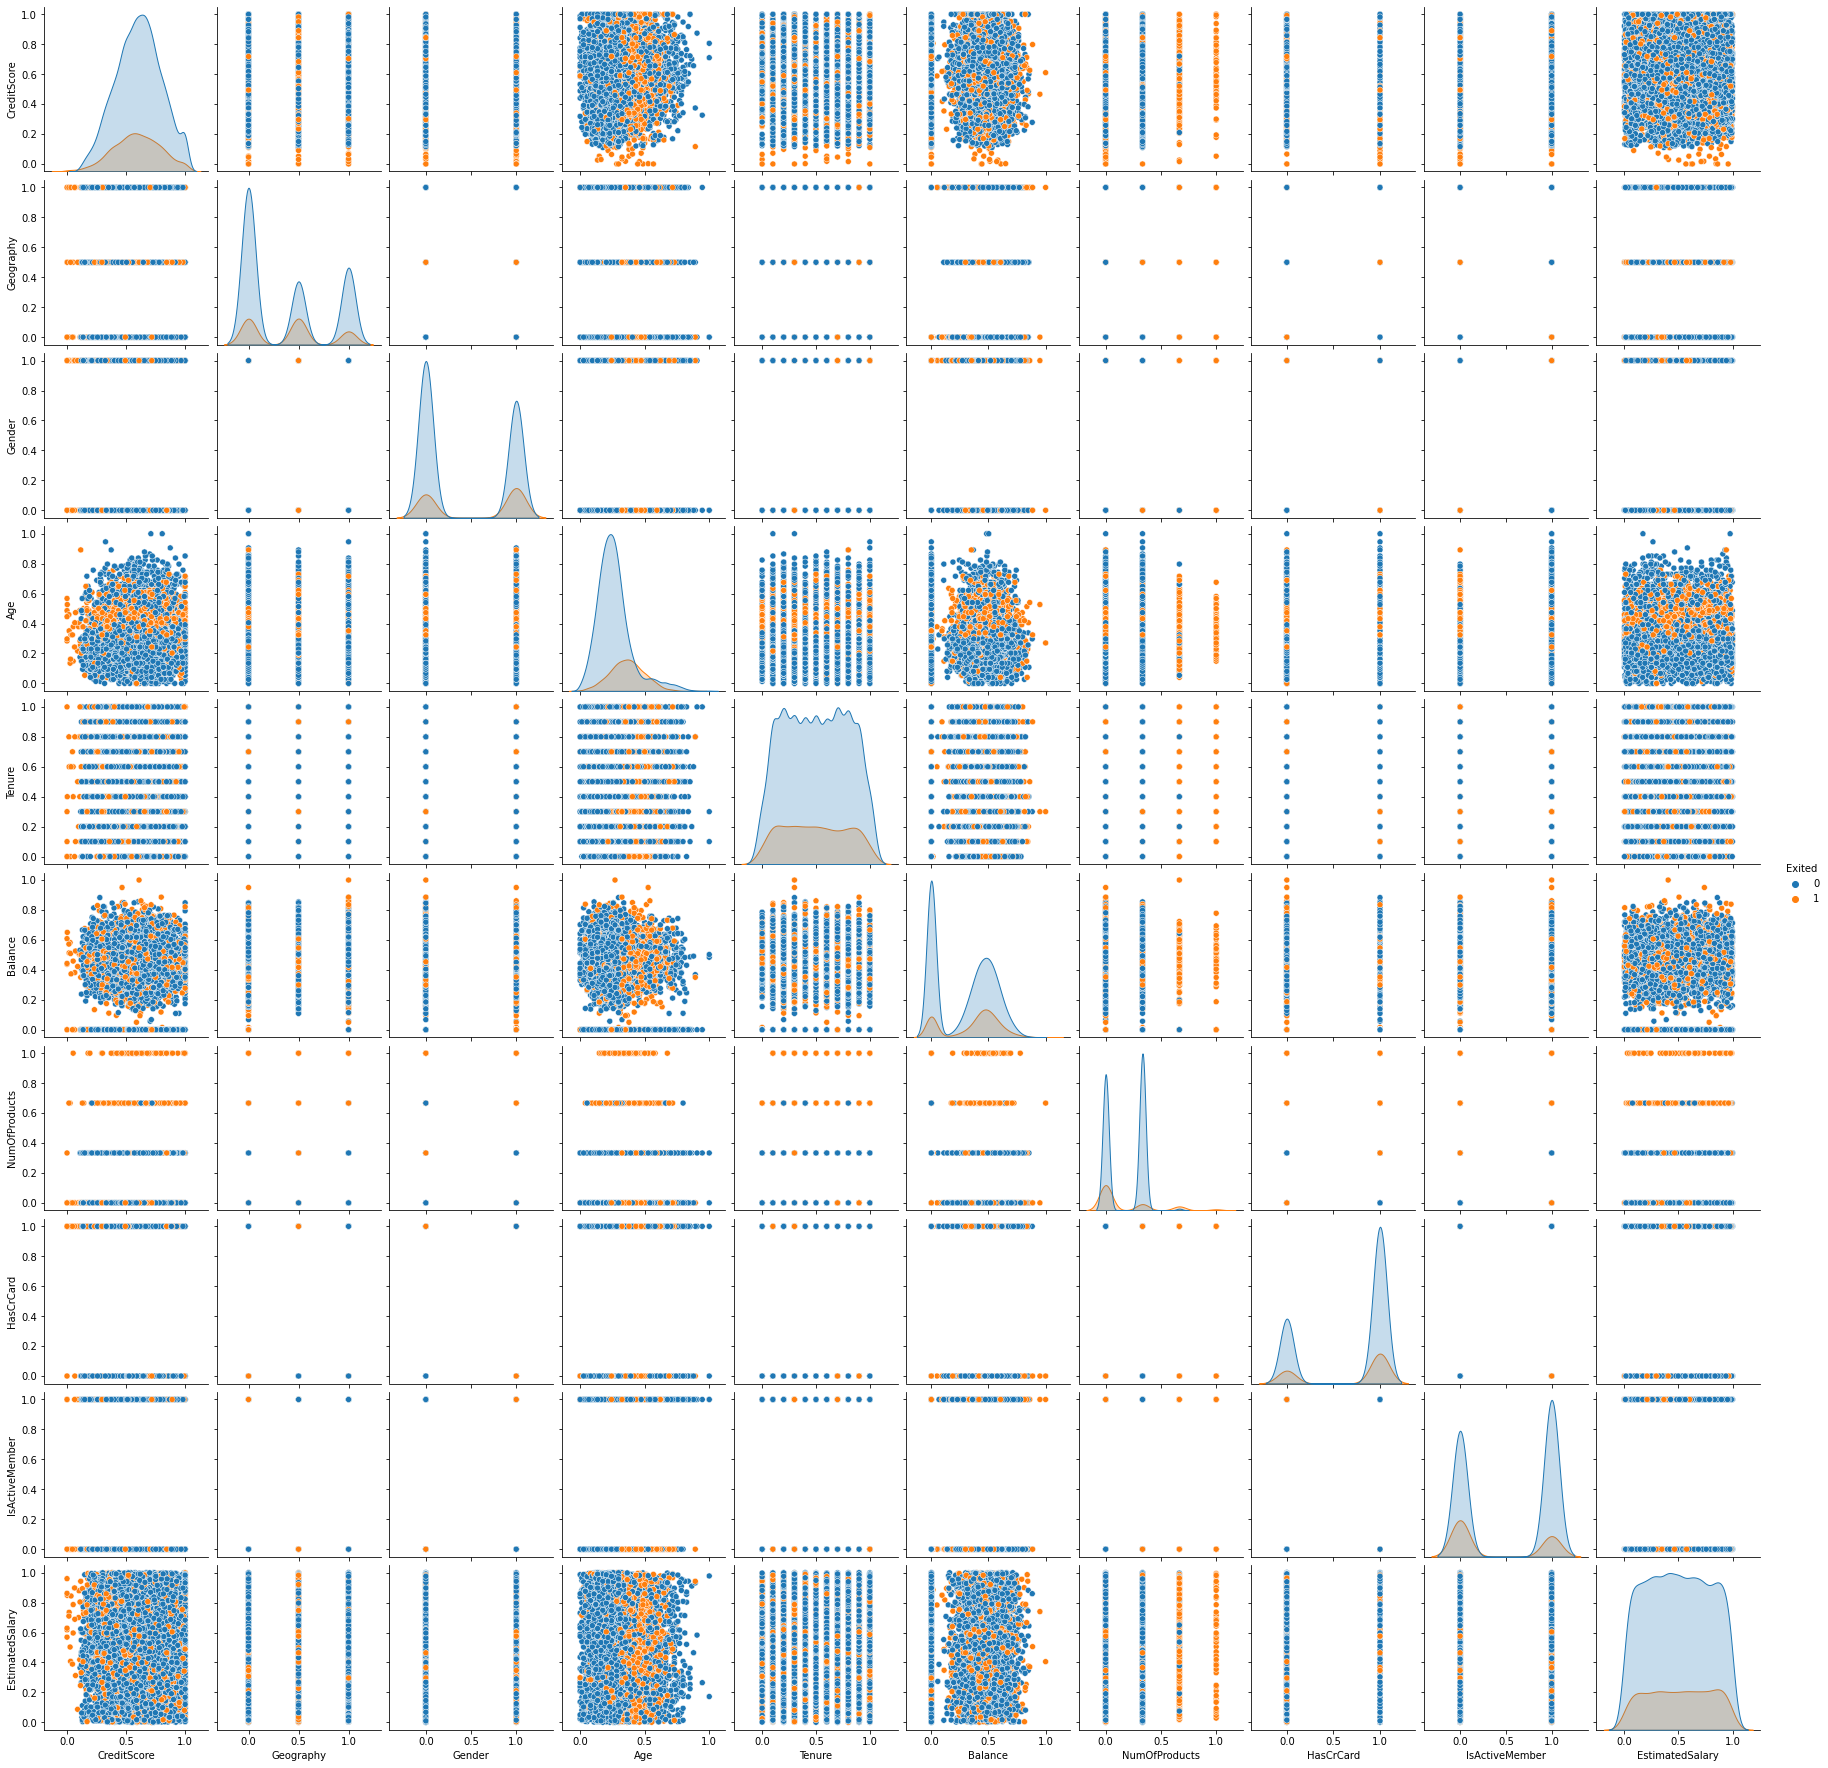

In [52]:
sns.pairplot(data=df, hue='Exited')

<AxesSubplot:>

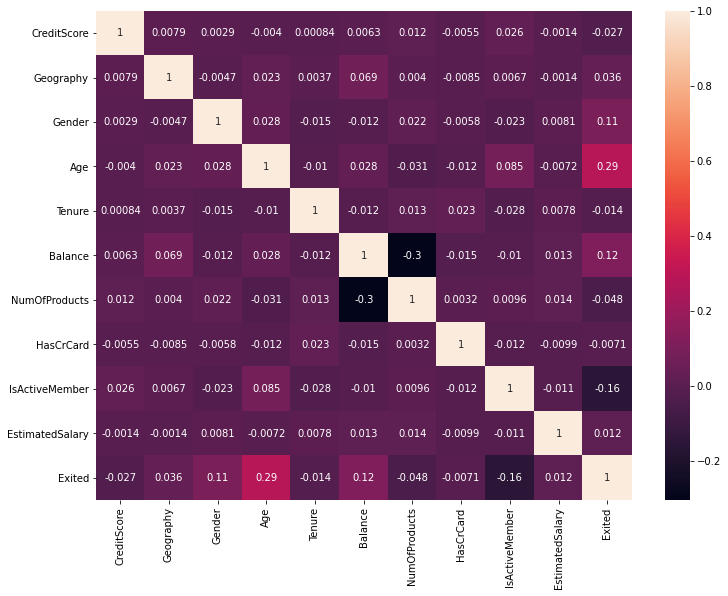

In [67]:
corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True)


In [11]:
col_to_scale= ['CreditScore','Geography','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(df[col_to_scale])

array([[0.538     , 0.        , 0.32432432, ..., 0.        , 0.        ,
        0.50673489],
       [0.516     , 1.        , 0.31081081, ..., 0.33403148, 0.        ,
        0.56270874],
       [0.304     , 0.        , 0.32432432, ..., 0.63635718, 0.66666667,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.24324324, ..., 0.        , 0.        ,
        0.21039009],
       [0.844     , 0.5       , 0.32432432, ..., 0.29922631, 0.33333333,
        0.46442905],
       [0.884     , 0.        , 0.13513514, ..., 0.51870777, 0.        ,
        0.19091423]])

In [13]:
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1517,0.788,0.0,0,0.486486,0.6,0.373882,0.333333,0,1,0.700353,0
8298,0.588,0.5,1,0.445946,0.4,0.380872,0.000000,0,0,0.363121,1
9305,0.624,0.0,1,0.283784,0.5,0.556250,0.333333,1,0,0.308153,0
2550,1.000,0.0,0,0.324324,0.0,0.000000,0.333333,1,0,0.220792,0
154,0.528,0.0,1,0.337838,0.6,0.000000,0.333333,1,1,0.545202,0


In [14]:
data= df.drop(['Exited'], axis=1)
target=df.Exited

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [69]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8075

Text(87.0, 0.5, 'Truth')

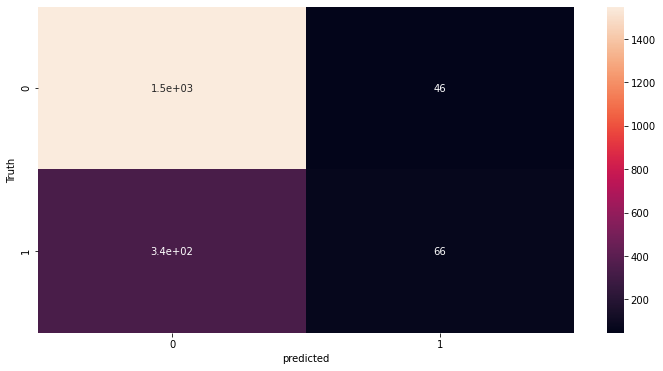

In [70]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [50]:
from xgboost import XGBRFClassifier
xgb=XGBRFClassifier()
xgb.fit(x_train, y_train)
xgb.score(x_test, y_test)

c:\users\amose\appdata\local\programs\python\python39\scripts\opencv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\amose\appdata\local\programs\python\python39\scripts\opencv\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.8625

In [55]:
y_predict = xgb.predict(x_test)

c:\users\amose\appdata\local\programs\python\python39\scripts\opencv\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [56]:
 from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8625

In [22]:
x_test.shape

(2000, 10)

In [17]:
import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [57]:
model=keras.Sequential([
    keras.layers.Dense(8, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy'])

model.fit(x_train, y_train, epochs=200)

Epoch 1/200
250/250 [==============================] - 2s 3ms/step - loss: 0.5769 - accuracy: 0.0000e+00
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.0000e+00
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.0000e+00
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4739 - accuracy: 0.0000e+00
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4625 - accuracy: 0.0000e+00
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.0000e+00
Epoch 7/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4519 - accuracy: 0.0000e+00
Epoch 8/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4456 - accuracy: 0.0000e+00
Epoch 9/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.0000e+00
Epoch 10/200
250/250 [==============================] -

250/250 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.0000e+00
Epoch 153/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.0000e+00
Epoch 154/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.0000e+00
Epoch 155/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.0000e+00
Epoch 156/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.0000e+00
Epoch 157/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.0000e+00
Epoch 158/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.0000e+00
Epoch 159/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.0000e+00
Epoch 160/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.0000e+00
Epoch 161/200
250/250 [============================

In [58]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.0000e+00


[0.3361291289329529, 0.0]

In [59]:
yp=model.predict(x_test)
yp

array([[0.21021572],
       [0.455823  ],
       [0.17703071],
       ...,
       [0.24440631],
       [0.11651969],
       [0.17416048]], dtype=float32)

In [60]:
y_test[:10]

9394    0
898     1
2398    0
5906    0
2343    0
8225    1
5506    0
6451    0
2670    1
3497    1
Name: Exited, dtype: int64

In [61]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [62]:
y_pred[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



Text(87.0, 0.5, 'Truth')

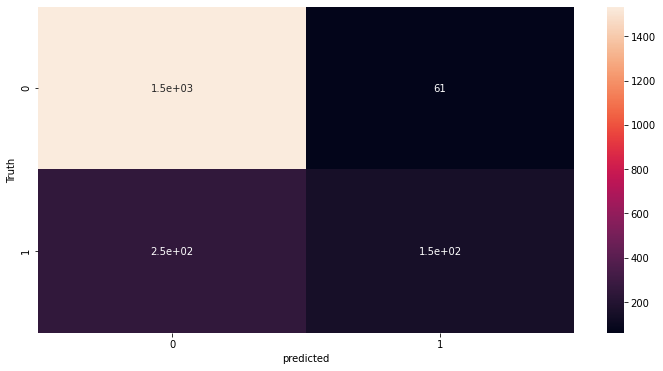

In [48]:
import seaborn as sns
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')